<a href="https://colab.research.google.com/github/Manege24/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub as kh
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#1
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
#2.See the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Getting summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


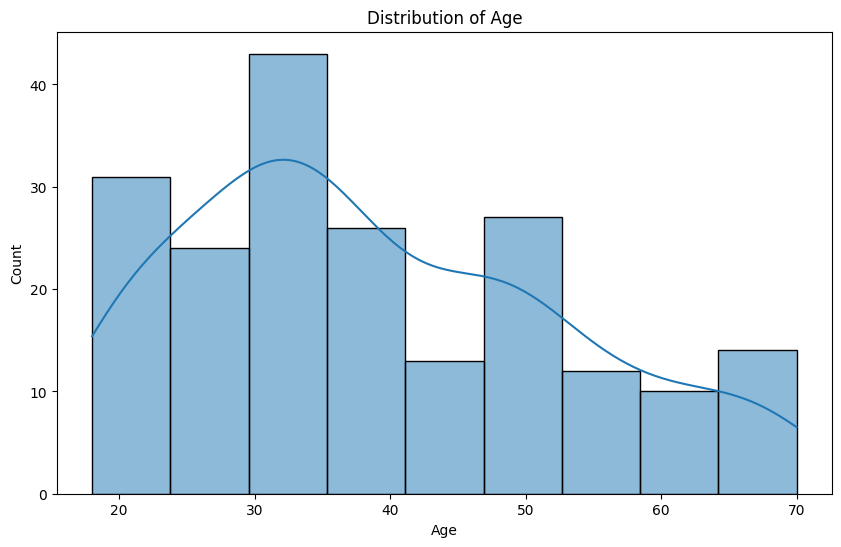

In [ ]:
#Distribution of age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

The majority of customers are in the age range of 30 to 35.

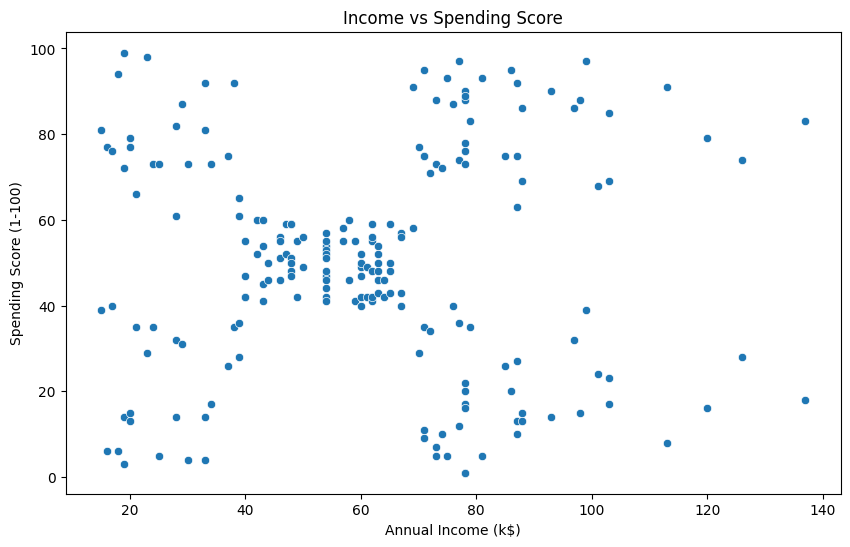

In [ ]:
#Income vs spending score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()

Around the range incomes 40-70k, we have a wide range of customers who spend a lot compared to very high and very low-income customers

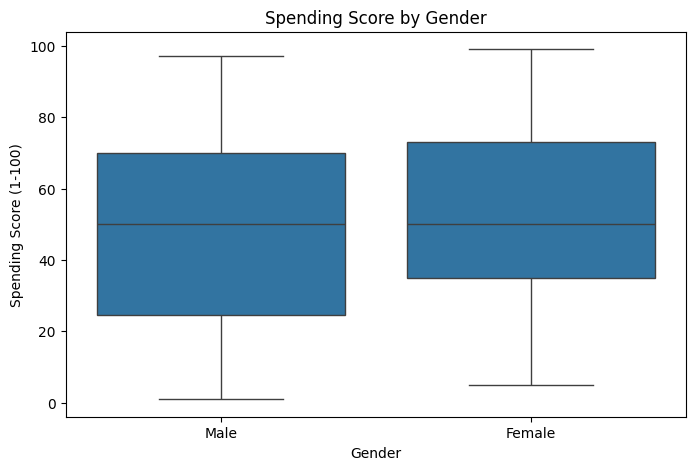

In [ ]:
#Spending score vs gender
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Spending Score by Gender')
plt.show()

Even though the average spending score is the same, the distribution is somehow different. Female customers show a slightly higher median spending score compared to male customers.

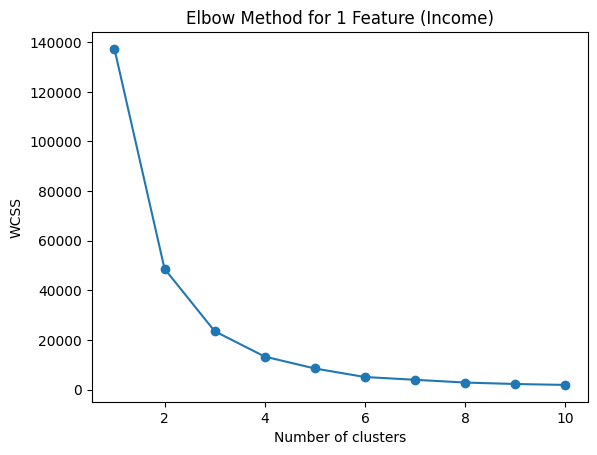

In [ ]:
#3.a)Clustering with 1 feature(for e.g: Annual Income)
#Elbow method
X1 = df[['Annual Income (k$)']].values # Select the 'Annual Income (k$)' column and convert to a numpy array
wcss = [] # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for 1 Feature (Income)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The 'elbow' is the point where the line bends sharply and it suggests the optimal 'k'

In [ ]:
#Silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

For k=2, Silhouette Score: 0.5434260062011069
For k=3, Silhouette Score: 0.5188101430914764
For k=4, Silhouette Score: 0.5487994945506594
For k=5, Silhouette Score: 0.5661950357949346
For k=6, Silhouette Score: 0.6016527991635554
For k=7, Silhouette Score: 0.5581684985739774
For k=8, Silhouette Score: 0.6092144509811741
For k=9, Silhouette Score: 0.6061961959513595
For k=10, Silhouette Score: 0.603405880880326


The 'k' with the highest score is optimal.

In [ ]:
#Applying K-Means
kmeans1 = KMeans(n_clusters=10, random_state=42)
df['Cluster_1Feature'] = kmeans1.fit_predict(X1)

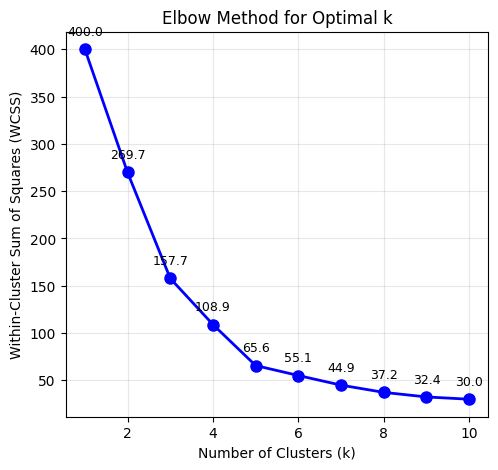

WCSS values:
k=1: WCSS = 400.00
k=2: WCSS = 269.69
k=3: WCSS = 157.70
k=4: WCSS = 108.92
k=5: WCSS = 65.57
k=6: WCSS = 55.06
k=7: WCSS = 44.86
k=8: WCSS = 37.23
k=9: WCSS = 32.39
k=10: WCSS = 29.98

Percentage reduction in WCSS:
k=1 to k=2: 32.58% reduction
k=2 to k=3: 41.52% reduction
k=3 to k=4: 30.93% reduction
k=4 to k=5: 39.80% reduction
k=5 to k=6: 16.03% reduction
k=6 to k=7: 18.51% reduction
k=7 to k=8: 17.02% reduction
k=8 to k=9: 12.99% reduction
k=9 to k=10: 7.44% reduction


In [ ]:
#3.b)Clustering with 2 features(for e.g. annual income and spending score)
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

#Elbow method
# Define the range of k values to test
k_range = range(1, 11)

# Calculate WCSS for different k values
wcss = []  # Within-Cluster Sum of Squares

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# Add annotations to show the values
for i, (k, w) in enumerate(zip(k_range, wcss)):
    plt.annotate(f'{w:.1f}', (k, w), textcoords="offset points",
                 xytext=(0,10), ha='center', fontsize=9)

plt.show()

# Calculate the percentage variance explained to help identify the elbow
print("WCSS values:")
for k, w in zip(k_range, wcss):
    print(f"k={k}: WCSS = {w:.2f}")

print("\nPercentage reduction in WCSS:")
for i in range(1, len(wcss)):
    reduction = ((wcss[i-1] - wcss[i]) / wcss[i-1]) * 100
    print(f"k={k_range[i-1]} to k={k_range[i]}: {reduction:.2f}% reduction")

k = 2: Silhouette Score = 0.3213
k = 3: Silhouette Score = 0.4666
k = 4: Silhouette Score = 0.4939
k = 5: Silhouette Score = 0.5547
k = 6: Silhouette Score = 0.5399
k = 7: Silhouette Score = 0.5281
k = 8: Silhouette Score = 0.4552
k = 9: Silhouette Score = 0.4571
k = 10: Silhouette Score = 0.4432


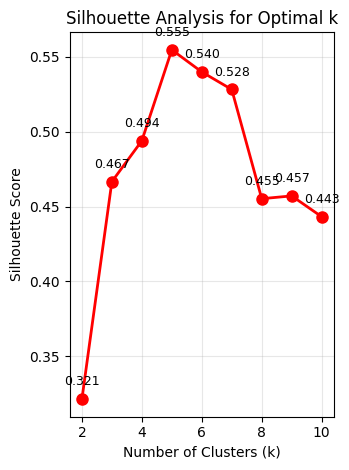

In [ ]:
#Silhouette method

# Calculating Silhouette Scores for different k values
silhouette_scores = []

# Defining the range of k values to test
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X2_scaled)
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"k = {k}: Silhouette Score = {silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True, alpha=0.3)

# Add annotations to show the values
for k, score in zip(k_range, silhouette_scores):
    plt.annotate(f'{score:.3f}', (k, score), textcoords="offset points",
                 xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

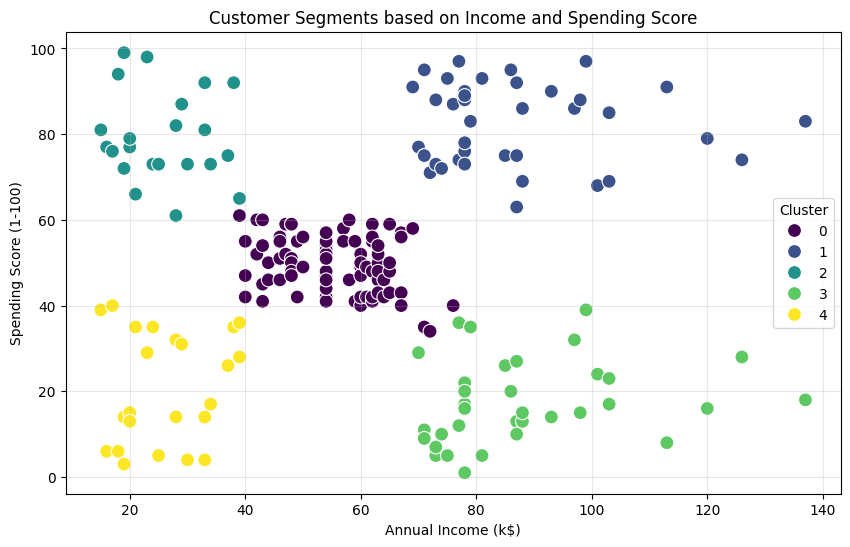

In [ ]:
# Applying K-Means with 5 clusters
kmeans2 = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster_2Features'] = kmeans2.fit_predict(X2_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_2Features', palette='viridis', s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

The two-feature model reveals much more refined segments. For example, we can now differentiate high-income low-spenders and high-income high-spenders, which was not possible with one feature. The distribution shows natural groupings that consider affordability and willingness to spend.

5. - Cluster 0: High Income, Low Spending Score

    Who they are: Wealthy but careful spenders.

    Engagement Strategy: Target them with high-quality, luxury product advertisements and exclusive pre-sale events to make them feel valued and tempt them to spend.

- Cluster 1: Average Income, Average Spending Score

    Who they are: The reliable, middle-class shoppers.

    Engagement Strategy: Provide family packages, bundle deals, and loyalty programs with clear, tangible rewards. They usually respond well to such propositions.

- Cluster 2: High Income, High Spending Score

    Who they are: They are the mall's VIPs and biggest spenders.

    Engagement Strategy: Offer a personal shopping assistant, premium parking, and the fastest service. Their feedback must taken into consideration very carefully.

- Cluster 3: Low Income, High Spending Score

    Who they are: They are budget-conscious but love to shop; they are likely younger.

    Engagement Strategy: Promote discounts, sales, trendy but affordable fashion brands, and student discounts. Engage them on social media with fun, viral content.

- Cluster 4: Low Income, Low Spending Score

    Who they are: They are the most price-sensitive customers.

    Engagement Strategy: Attract them with essential service providers (e.g., a grocery store) and heavy discount advertisements.